In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir("C:/Personal/Coding/Quant Project/Research")


In [3]:
df = pd.read_csv('Data/ICICIBANK_Feature.csv', index_col=0, parse_dates=True)


In [4]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20
2015-02-02 12:28:00,318.91,319.27,318.77,319.05,48781.0,0.000439,0.000738,0.000618,319.2825,320.074000,NaN
2015-02-02 12:29:00,319.00,319.55,319.00,319.14,76450.0,0.000282,0.000743,0.000618,319.2465,320.048333,NaN
2015-02-02 12:30:00,319.18,319.50,319.09,319.14,64566.0,0.000000,0.000716,0.000613,319.2260,320.026500,NaN
2015-02-02 12:31:00,319.32,319.32,319.09,319.14,75786.0,0.000000,0.000700,0.000613,319.1965,320.004667,NaN
2015-02-02 12:32:00,319.09,319.36,319.00,319.00,55437.0,-0.000439,0.000679,0.000608,319.1490,319.977333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009
2023-02-20 15:29:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000436,851.4925,852.575000,0.074009


In [5]:
df.index.name = "timestamp"

In [6]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20
timestamp,,,,,,,,,,,
2015-02-02 12:28:00,318.91,319.27,318.77,319.05,48781.0,0.000439,0.000738,0.000618,319.2825,320.074000,NaN
2015-02-02 12:29:00,319.00,319.55,319.00,319.14,76450.0,0.000282,0.000743,0.000618,319.2465,320.048333,NaN
2015-02-02 12:30:00,319.18,319.50,319.09,319.14,64566.0,0.000000,0.000716,0.000613,319.2260,320.026500,NaN
2015-02-02 12:31:00,319.32,319.32,319.09,319.14,75786.0,0.000000,0.000700,0.000613,319.1965,320.004667,NaN
2015-02-02 12:32:00,319.09,319.36,319.00,319.00,55437.0,-0.000439,0.000679,0.000608,319.1490,319.977333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009


In [7]:
from src.strategy import backtest_mean_reversion_existing_features

In [8]:
df=backtest_mean_reversion_existing_features(df)

In [9]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20,signal,position,strategy_return,cum_strategy,cum_market
timestamp,,,,,,,,,,,,,,,,
2015-02-02 12:47:00,319.09,319.14,319.09,319.14,295417.0,0.000000,0.000407,0.000559,319.1035,319.584667,-0.088614,0.0,0.0,0.00000,0.000000,0.000000
2015-02-02 12:48:00,319.09,319.50,318.91,319.09,72710.0,-0.000157,0.000397,0.000559,319.1055,319.564167,-0.410002,0.0,0.0,-0.00000,0.000000,-0.000157
2015-02-02 12:49:00,319.00,319.41,319.00,319.18,76971.0,0.000282,0.000397,0.000551,319.1075,319.541333,0.693807,0.0,0.0,0.00000,0.000000,0.000125
2015-02-02 12:50:00,319.18,319.55,319.14,319.55,90500.0,0.001159,0.000474,0.000573,319.1280,319.525500,2.310673,0.0,0.0,0.00000,0.000000,0.001284
2015-02-02 12:51:00,319.45,319.59,319.27,319.32,62106.0,-0.000720,0.000505,0.000579,319.1370,319.507333,-1.481417,-1.0,-1.0,0.00072,0.000720,0.000564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575,0.0,0.0,0.00000,9.972793,0.981546
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546,0.0,0.0,0.00000,9.972793,0.981546
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009,0.0,0.0,0.00000,9.972793,0.981546


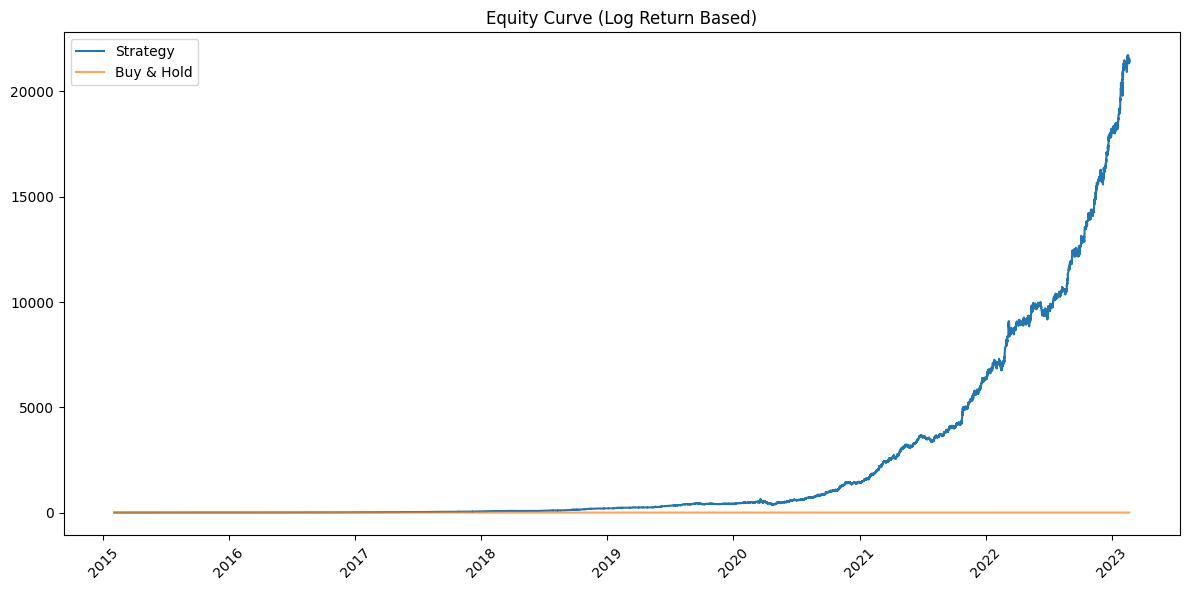

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, np.exp(df['cum_strategy']), label='Strategy')
plt.plot(df.index, np.exp(df['cum_market']), label='Buy & Hold', alpha=0.7)
plt.legend()
plt.title('Equity Curve (Log Return Based)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Z-score distribution sanity
df['zscore_20'].describe()

# Position counts
df['position'].value_counts()

# Trades
(df['position'].diff().abs() > 0).sum()

# Strategy vs Market
df[['cum_strategy', 'cum_market']].tail()

,cum_strategy,cum_market
timestamp,,
2023-02-20 15:26:00,9.972793,0.981546
2023-02-20 15:27:00,9.972793,0.981546
2023-02-20 15:28:00,9.972793,0.981546
2023-02-20 15:29:00,9.972793,0.981546
2023-02-20 15:30:00,9.972793,0.981546


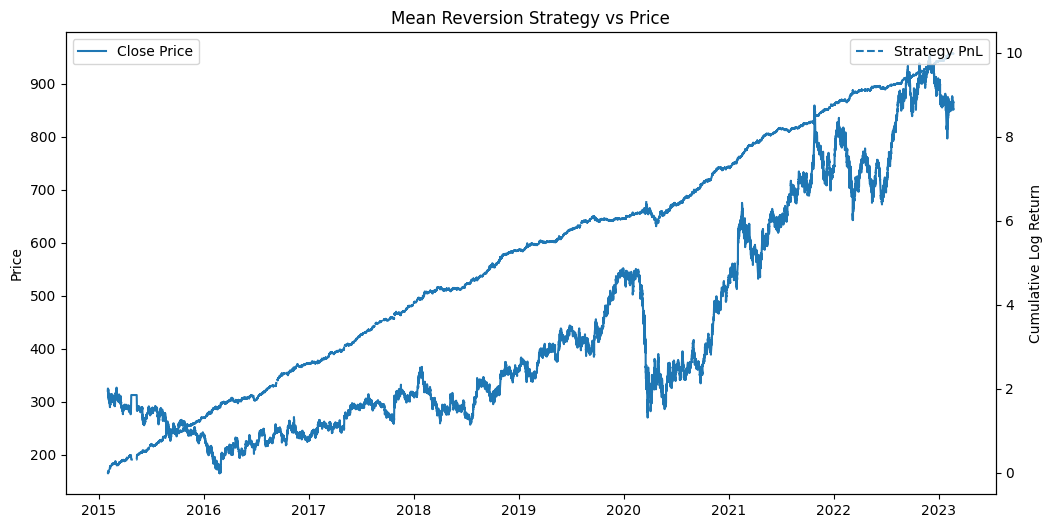

In [13]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Price
ax1.plot(df.index, df['close'], label='Close Price')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Strategy equity
ax2 = ax1.twinx()
ax2.plot(df.index, df['cum_strategy'], label='Strategy PnL', linestyle='--')
ax2.set_ylabel('Cumulative Log Return')
ax2.legend(loc='upper right')

plt.title('Mean Reversion Strategy vs Price')
plt.show()


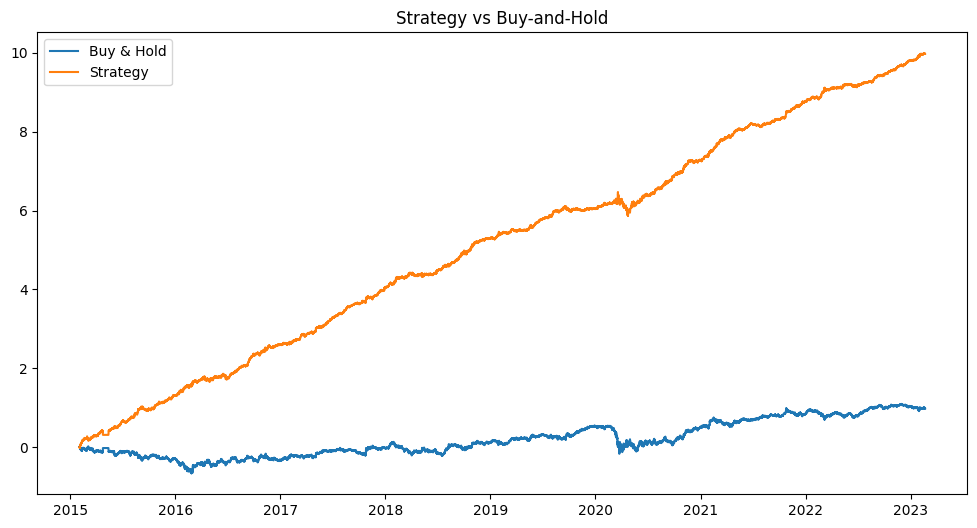

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cum_market'], label='Buy & Hold')
plt.plot(df.index, df['cum_strategy'], label='Strategy')
plt.legend()
plt.title('Strategy vs Buy-and-Hold')
plt.show()

In [15]:
yearly = df.resample('Y').sum()[['strategy_return', 'log_return']]
yearly.columns = ['Strategy', 'Market']
yearly

C:\Users\bvshr\AppData\Local\Temp\ipykernel_5152\3538216931.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample('Y').sum()[['strategy_return', 'log_return']]


,Strategy,Market
timestamp,,
2015-12-31,1.309935,-0.296431
2016-12-31,1.286943,-0.023065
2017-12-31,1.453513,0.304055
2018-12-31,1.245150,0.138135
2019-12-31,0.752685,0.400742
2020-12-31,1.219402,-0.008670
2021-12-31,1.492255,0.327335
2022-12-31,1.048704,0.186800
2023-12-31,0.164205,-0.047355


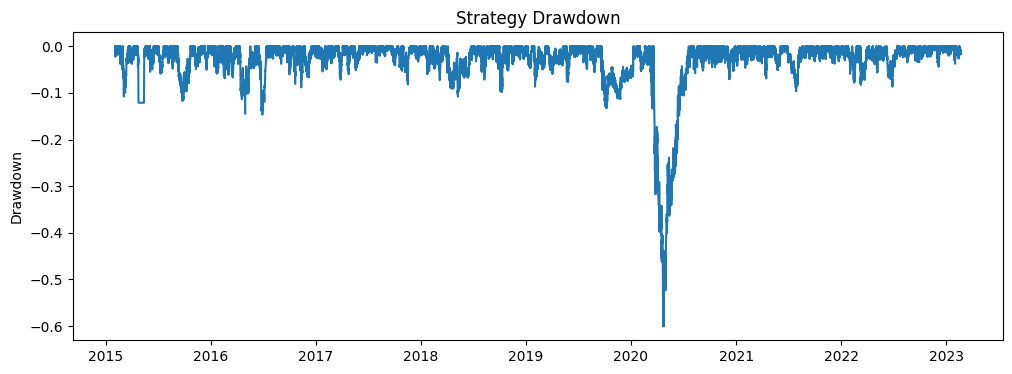

In [16]:
dd = df['cum_strategy'] - df['cum_strategy'].cummax()

plt.figure(figsize=(12, 4))
plt.plot(dd)
plt.title('Strategy Drawdown')
plt.ylabel('Drawdown')
plt.show()

In [17]:
trades = df['position'].diff().abs() > 0
trade_count = trades.sum()

hit_rate = (df['strategy_return'] > 0).mean()

print(f"Trades: {trade_count}")
print(f"Hit Rate: {hit_rate:.2%}")

Trades: 338782
Hit Rate: 29.09%


In [18]:
sharpe = (
    df['strategy_return'].mean() /
    df['strategy_return'].std()
) * np.sqrt(252 * 390)

print(f"Sharpe: {sharpe:.2f}")

Sharpe: 3.91


In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir("C:/Personal/Coding/Quant Project/Research")

In [3]:
df = pd.read_csv('Data/ICICIBANK_Feature.csv', index_col=0, parse_dates=True)

In [4]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20
2015-02-02 12:28:00,318.91,319.27,318.77,319.05,48781.0,0.000439,0.000738,0.000618,319.2825,320.074000,NaN
2015-02-02 12:29:00,319.00,319.55,319.00,319.14,76450.0,0.000282,0.000743,0.000618,319.2465,320.048333,NaN
2015-02-02 12:30:00,319.18,319.50,319.09,319.14,64566.0,0.000000,0.000716,0.000613,319.2260,320.026500,NaN
2015-02-02 12:31:00,319.32,319.32,319.09,319.14,75786.0,0.000000,0.000700,0.000613,319.1965,320.004667,NaN
2015-02-02 12:32:00,319.09,319.36,319.00,319.00,55437.0,-0.000439,0.000679,0.000608,319.1490,319.977333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009
2023-02-20 15:29:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000436,851.4925,852.575000,0.074009


In [5]:
df.index.name = "timestamp"

In [6]:
from src.strategy import backtest_mean_reversion_existing_features

In [7]:
plot(myData.close)
title('Close Price Over Time')
xlabel('Index')
ylabel('Price')
grid on

SyntaxError: invalid syntax (3291290741.py, line 5)

In [8]:
plt.plot(myData.index, myData['close'])
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.plot(myData.index, myData['close'])
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


NameError: name 'myData' is not defined

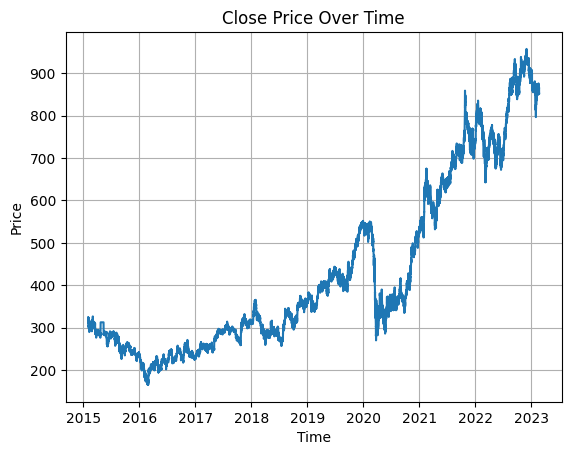

In [11]:
plt.plot(df.index, df['close'])
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [12]:
df=backtest_mean_reversion_existing_features(df)

In [13]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20,signal,position,strategy_return,cum_strategy,cum_market
timestamp,,,,,,,,,,,,,,,,
2015-02-02 12:47:00,319.09,319.14,319.09,319.14,295417.0,0.000000,0.000407,0.000559,319.1035,319.584667,-0.088614,0.0,0.0,0.00000,0.000000,0.000721
2015-02-02 12:48:00,319.09,319.50,318.91,319.09,72710.0,-0.000157,0.000397,0.000559,319.1055,319.564167,-0.410002,0.0,0.0,-0.00000,0.000000,0.000564
2015-02-02 12:49:00,319.00,319.41,319.00,319.18,76971.0,0.000282,0.000397,0.000551,319.1075,319.541333,0.693807,0.0,0.0,0.00000,0.000000,0.000846
2015-02-02 12:50:00,319.18,319.55,319.14,319.55,90500.0,0.001159,0.000474,0.000573,319.1280,319.525500,2.310673,0.0,0.0,0.00000,0.000000,0.002005
2015-02-02 12:51:00,319.45,319.59,319.27,319.32,62106.0,-0.000720,0.000505,0.000579,319.1370,319.507333,-1.481417,-1.0,-1.0,0.00072,0.000720,0.001285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575,0.0,0.0,0.00000,3.412192,0.982267
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546,0.0,0.0,0.00000,3.412192,0.982267
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009,0.0,0.0,0.00000,3.412192,0.982267


In [14]:
sharpe = (
    df['strategy_return'].mean() /
    df['strategy_return'].std()
) * np.sqrt(252 * 390)

print(f"Sharpe: {sharpe:.2f}")

Sharpe: 2.18


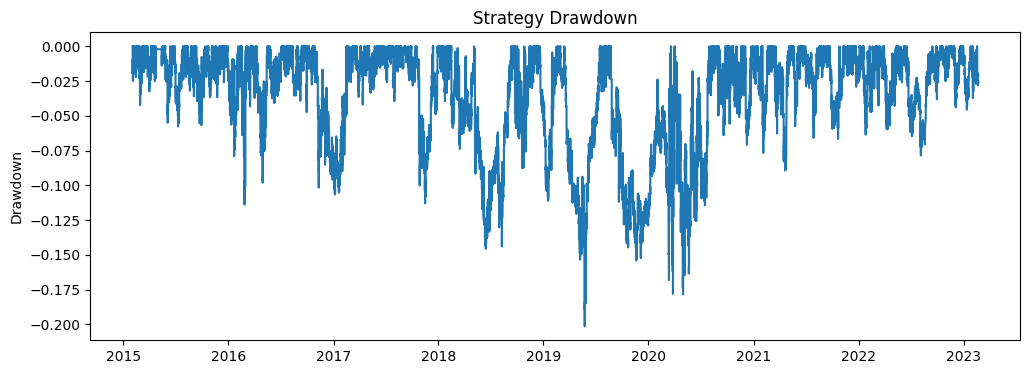

In [15]:
dd = df['cum_strategy'] - df['cum_strategy'].cummax()

plt.figure(figsize=(12, 4))
plt.plot(dd)
plt.title('Strategy Drawdown')
plt.ylabel('Drawdown')
plt.show()

In [16]:
trade_count = (df['position'].diff().abs() > 0).sum()
print(trade_count)

338487


In [17]:
trades_per_day = trade_count / (len(df) / 390)
print(trades_per_day)

183.34763429898416


In [18]:
df['strategy_return'].corr(df['log_return'])

np.float64(-0.014243521194598572)

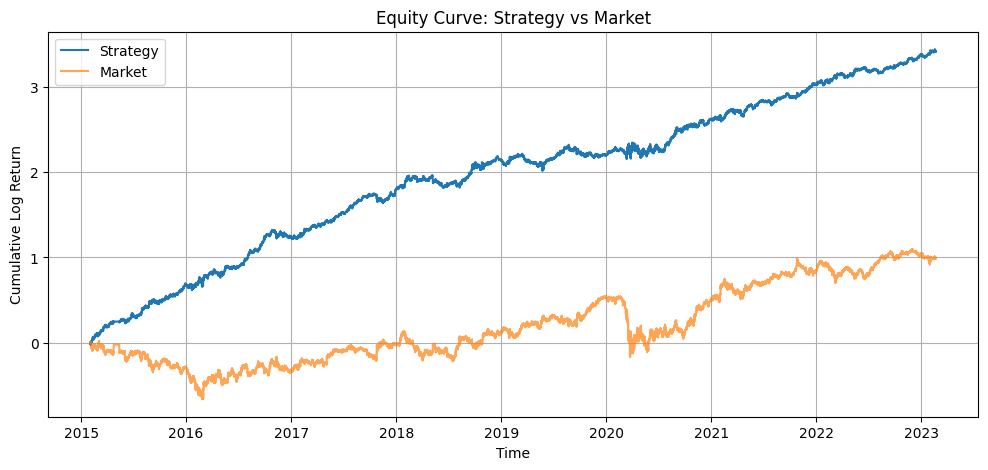

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['cum_strategy'], label='Strategy')
plt.plot(df.index, df['cum_market'], label='Market', alpha=0.7)

plt.title('Equity Curve: Strategy vs Market')
plt.xlabel('Time')
plt.ylabel('Cumulative Log Return')
plt.grid(True)
plt.legend()
plt.show()

<Axes: title={'center': 'Rolling Sharpe (1Y)'}, xlabel='timestamp'>

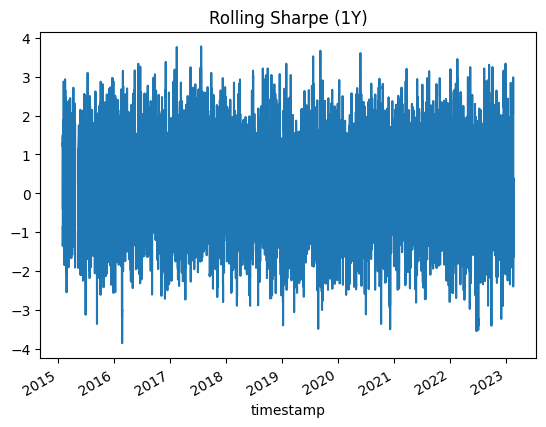

In [20]:
rolling_sharpe = (
    df['strategy_return']
    .rolling(252)
    .mean() /
    df['strategy_return'].rolling(252).std()
) * np.sqrt(252)

rolling_sharpe.plot(title="Rolling Sharpe (1Y)")

In [1]:
import pandas as pd

In [2]:
imoprt numpy as np

SyntaxError: invalid syntax (3439681406.py, line 1)

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("C:/Personal/Coding/Quant Project/Research")
df = pd.read_csv('Data/ICICIBANK_Feature.csv', index_col=0, parse_dates=True)
df.index.name = "timestamp"
from src.strategy import backtest_mean_reversion_existing_features

In [2]:
df=backtest_mean_reversion_existing_features(df)

In [3]:
df

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20,signal,position,strategy_return,cum_strategy,cum_market,position_change,transaction_cost,strategy_return_net,cum_strategy_net
timestamp,,,,,,,,,,,,,,,,,,,,
2015-02-02 12:47:00,319.09,319.14,319.09,319.14,295417.0,0.000000,0.000407,0.000559,319.1035,319.584667,-0.088614,0.0,0.0,0.00000,0.000000,0.000721,0.0,0.0000,0.00000,0.000000
2015-02-02 12:48:00,319.09,319.50,318.91,319.09,72710.0,-0.000157,0.000397,0.000559,319.1055,319.564167,-0.410002,0.0,0.0,-0.00000,0.000000,0.000564,0.0,0.0000,-0.00000,0.000000
2015-02-02 12:49:00,319.00,319.41,319.00,319.18,76971.0,0.000282,0.000397,0.000551,319.1075,319.541333,0.693807,0.0,0.0,0.00000,0.000000,0.000846,0.0,0.0000,0.00000,0.000000
2015-02-02 12:50:00,319.18,319.55,319.14,319.55,90500.0,0.001159,0.000474,0.000573,319.1280,319.525500,2.310673,0.0,0.0,0.00000,0.000000,0.002005,0.0,0.0000,0.00000,0.000000
2015-02-02 12:51:00,319.45,319.59,319.27,319.32,62106.0,-0.000720,0.000505,0.000579,319.1370,319.507333,-1.481417,-1.0,-1.0,0.00072,0.000720,0.001285,1.0,0.0005,0.00022,0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575,0.0,0.0,0.00000,3.412192,0.982267,0.0,0.0000,0.00000,-170.706808
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546,0.0,0.0,0.00000,3.412192,0.982267,0.0,0.0000,0.00000,-170.706808
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009,0.0,0.0,0.00000,3.412192,0.982267,0.0,0.0000,0.00000,-170.706808


In [4]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['cum_strategy'], label='Gross Strategy')
plt.plot(df.index, df['cum_strategy_net'], label='Net Strategy')
plt.plot(df.index, df['cum_market'], label='Market', alpha=0.6)

plt.title('Equity Curve Comparison')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

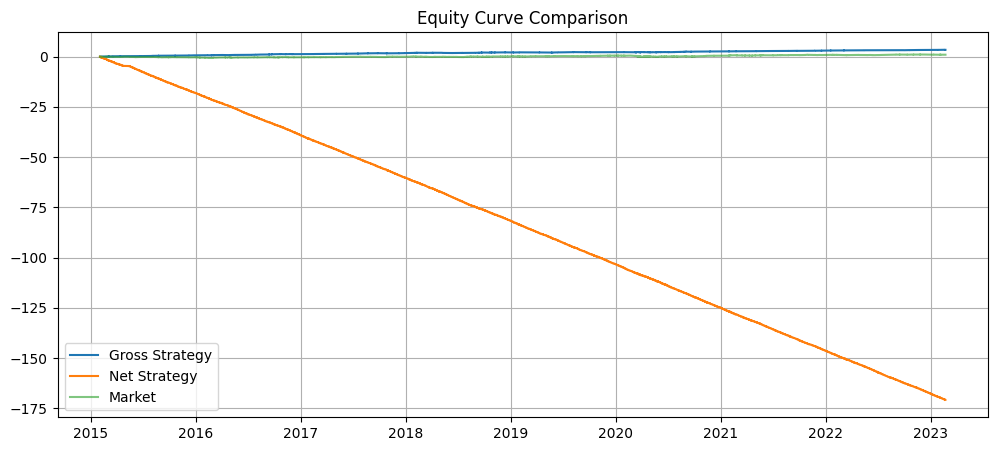

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df.index, df['cum_strategy'], label='Gross Strategy')
plt.plot(df.index, df['cum_strategy_net'], label='Net Strategy')
plt.plot(df.index, df['cum_market'], label='Market', alpha=0.6)

plt.title('Equity Curve Comparison')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
sharpe = (
    df['strategy_return'].mean() /
    df['strategy_return'].std()
) * np.sqrt(252 * 390)

print(f"Sharpe: {sharpe:.2f}")

Sharpe: 2.18


In [7]:
print(df_result['position'].value_counts())

# Visualize positions over time
df_result['position'].plot(figsize=(12,3), title='Position Over Time')
plt.ylabel('Position')
plt.show()

NameError: name 'df_result' is not defined

In [8]:
print(df['position'].value_counts())

# Visualize positions over time
df_result['position'].plot(figsize=(12,3), title='Position Over Time')
plt.ylabel('Position')
plt.show()

position
 0.0    325976
-1.0    200700
 1.0    193322
Name: count, dtype: int64


NameError: name 'df_result' is not defined

position
 0.0    325976
-1.0    200700
 1.0    193322
Name: count, dtype: int64


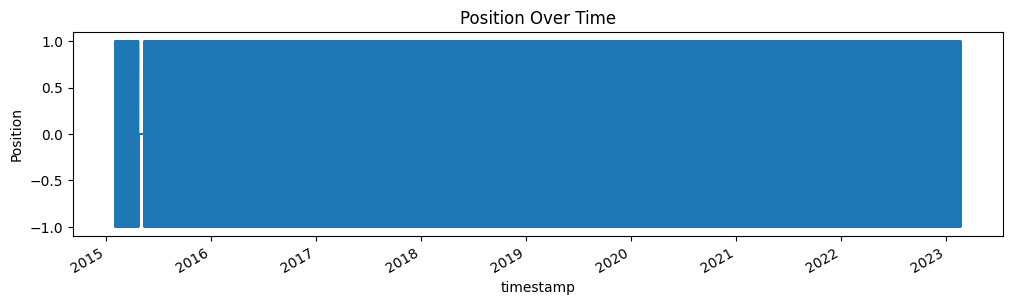

In [9]:
print(df['position'].value_counts())

# Visualize positions over time
df['position'].plot(figsize=(12,3), title='Position Over Time')
plt.ylabel('Position')
plt.show()

In [10]:
no_trade_rows = df['position_change'] == 0

# Transaction cost should be exactly zero there
(df.loc[no_trade_rows, 'transaction_cost'] == 0).all()

np.True_

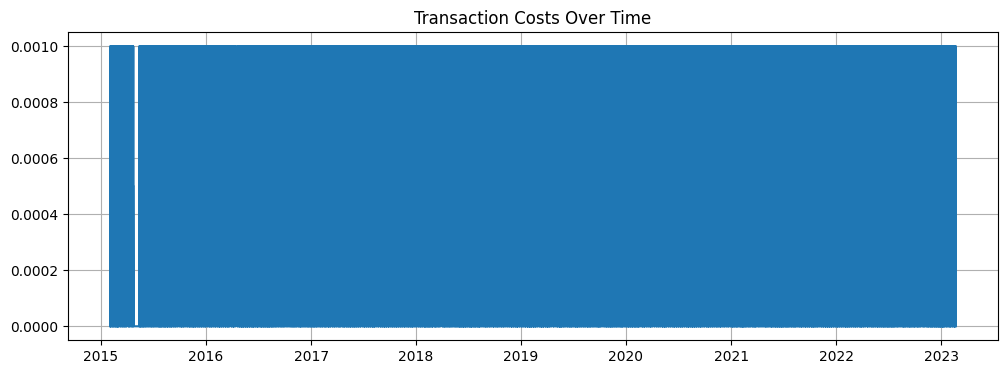

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df.index, df['transaction_cost'])
plt.title('Transaction Costs Over Time')
plt.grid(True)
plt.show()

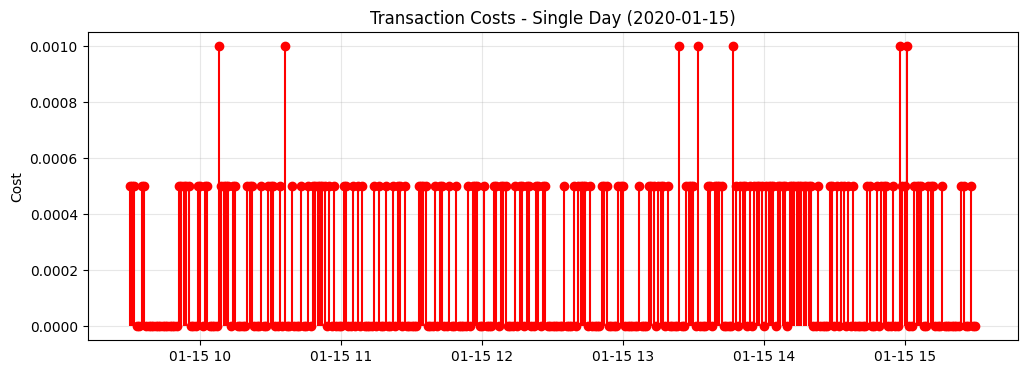

Total bars this day: 361
Bars with cost > 0: 172
Bars with cost = 0: 189


In [12]:
one_day = df.loc['2020-01-15']  # Pick any single day

plt.figure(figsize=(12,4))
plt.stem(one_day.index, one_day['transaction_cost'], linefmt='red', 
         markerfmt='ro', basefmt=' ')
plt.title('Transaction Costs - Single Day (2020-01-15)')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.show()

# Also check the numbers
print(f"Total bars this day: {len(one_day)}")
print(f"Bars with cost > 0: {(one_day['transaction_cost'] > 0).sum()}")
print(f"Bars with cost = 0: {(one_day['transaction_cost'] == 0).sum()}")

In [13]:
trades = df_result[df_result['transaction_cost'] > 0]

avg_gross_per_trade = df_result['strategy_return'].sum() / len(trades)
avg_cost_per_trade = 0.0005  # Your 5 bps

print(f"Average gross return per trade: {avg_gross_per_trade:.6f}")
print(f"Average cost per trade:         {avg_cost_per_trade:.6f}")
print(f"Average net per trade:          {(avg_gross_per_trade - avg_cost_per_trade):.6f}")

NameError: name 'df_result' is not defined

In [14]:
trades = df_result[df['transaction_cost'] > 0]

avg_gross_per_trade = df['strategy_return'].sum() / len(trades)
avg_cost_per_trade = 0.0005  # Your 5 bps

print(f"Average gross return per trade: {avg_gross_per_trade:.6f}")
print(f"Average cost per trade:         {avg_cost_per_trade:.6f}")
print(f"Average net per trade:          {(avg_gross_per_trade - avg_cost_per_trade):.6f}")

NameError: name 'df_result' is not defined

In [15]:
trades = df[df['transaction_cost'] > 0]

avg_gross_per_trade = df['strategy_return'].sum() / len(trades)
avg_cost_per_trade = 0.0005  # Your 5 bps

print(f"Average gross return per trade: {avg_gross_per_trade:.6f}")
print(f"Average cost per trade:         {avg_cost_per_trade:.6f}")
print(f"Average net per trade:          {(avg_gross_per_trade - avg_cost_per_trade):.6f}")

Average gross return per trade: 0.000010
Average cost per trade:         0.000500
Average net per trade:          -0.000490


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:/Personal/Coding/Quant Project/Research")
df = pd.read_csv('Data/ICICIBANK_Feature.csv', index_col=0, parse_dates=True)
df.index.name = "timestamp"
from src.strategy import backtest_mean_reversion_existing_features

In [2]:
df_result=backtest_mean_reversion_existing_features(df)

In [3]:
df


,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20
timestamp,,,,,,,,,,,
2015-02-02 12:28:00,318.91,319.27,318.77,319.05,48781.0,0.000439,0.000738,0.000618,319.2825,320.074000,NaN
2015-02-02 12:29:00,319.00,319.55,319.00,319.14,76450.0,0.000282,0.000743,0.000618,319.2465,320.048333,NaN
2015-02-02 12:30:00,319.18,319.50,319.09,319.14,64566.0,0.000000,0.000716,0.000613,319.2260,320.026500,NaN
2015-02-02 12:31:00,319.32,319.32,319.09,319.14,75786.0,0.000000,0.000700,0.000613,319.1965,320.004667,NaN
2015-02-02 12:32:00,319.09,319.36,319.00,319.00,55437.0,-0.000439,0.000679,0.000608,319.1490,319.977333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009


In [4]:
df_result

,open,high,low,close,volume,log_return,vol_20,vol_60,sma_20,sma_60,zscore_20,signal,position,strategy_return,cum_strategy,cum_market,position_change,transaction_cost,strategy_return_net,cum_strategy_net
timestamp,,,,,,,,,,,,,,,,,,,,
2015-02-02 12:47:00,319.09,319.14,319.09,319.14,295417.0,0.000000,0.000407,0.000559,319.1035,319.584667,-0.088614,0.0,0.0,0.0,0.00000,0.000721,0.0,0.0,0.0,0.00000
2015-02-02 12:48:00,319.09,319.50,318.91,319.09,72710.0,-0.000157,0.000397,0.000559,319.1055,319.564167,-0.410002,0.0,0.0,-0.0,0.00000,0.000564,0.0,0.0,-0.0,0.00000
2015-02-02 12:49:00,319.00,319.41,319.00,319.18,76971.0,0.000282,0.000397,0.000551,319.1075,319.541333,0.693807,0.0,0.0,0.0,0.00000,0.000846,0.0,0.0,0.0,0.00000
2015-02-02 12:50:00,319.18,319.55,319.14,319.55,90500.0,0.001159,0.000474,0.000573,319.1280,319.525500,2.310673,0.0,0.0,0.0,0.00000,0.002005,0.0,0.0,0.0,0.00000
2015-02-02 12:51:00,319.45,319.59,319.27,319.32,62106.0,-0.000720,0.000505,0.000579,319.1370,319.507333,-1.481417,0.0,0.0,-0.0,0.00000,0.001285,0.0,0.0,-0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:26:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000286,0.000469,851.5400,852.570000,0.102575,0.0,0.0,0.0,0.79267,0.982267,0.0,0.0,0.0,-166.92533
2023-02-20 15:27:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000279,0.000447,851.5275,852.564167,0.052546,0.0,0.0,0.0,0.79267,0.982267,0.0,0.0,0.0,-166.92533
2023-02-20 15:28:00,851.00,851.70,850.50,851.65,0.0,0.000000,0.000278,0.000442,851.5100,852.565833,0.074009,0.0,0.0,0.0,0.79267,0.982267,0.0,0.0,0.0,-166.92533


In [5]:
trades = df_result[df_result['transaction_cost'] > 0]

avg_gross_per_trade = df_result['strategy_return'].sum() / len(trades)
avg_cost_per_trade = 0.0005  # Your 5 bps

print(f"Average gross return per trade: {avg_gross_per_trade:.6f}")
print(f"Average cost per trade:         {avg_cost_per_trade:.6f}")
print(f"Average net per trade:          {(avg_gross_per_trade - avg_cost_per_trade):.6f}")

Average gross return per trade: 0.000002
Average cost per trade:         0.000500
Average net per trade:          -0.000498


In [6]:
sharpe = (
    df_result['strategy_return'].mean() /
    df_result['strategy_return'].std()
) * np.sqrt(252 * 390)

print(f"Sharpe: {sharpe:.2f}")

Sharpe: 0.51


In [8]:

total_trades = (df_result['transaction_cost'] > 0).sum()
total_days = len(df_result.index.date.unique())  # Assuming datetime index

trades_per_day_avg = total_trades / total_days

print(f"Total trades: {total_trades}")
print(f"Total trading days: {total_days}")
print(f"Average trades per day: {trades_per_day_avg:.1f}")

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [9]:
trades_per_day = (df_result['transaction_cost'] > 0).sum() / len(df_result.index.date.unique())
print(f"Trades per day: {trades_per_day:.1f}")

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [10]:
trade_count = (df_result['position'].diff().abs() > 0).sum()
print(trade_count)
trades_per_day = trade_count / (len(df_result) / 390)
print(trades_per_day)

332078
179.8760829891194
